In [10]:
import annotation_analysis as an
from Data import symbol_graph as sg
from importlib import reload
import text_encoding
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
reload(an); reload(sg)

<module 'Data.symbol_graph' from 'c:\\Users\\jf22881\\Documents\\GitHub\\context-art-classification\\Data\\symbol_graph.py'>

Symbol mat: (19244, 225) Set: train Symbol names: 225
Target density: [0.01060070671378092, 0.004313032633548119, 0.0035335689045936395]
Symbol mat: (1069, 225) Set: val Symbol names: 225
Target density: [0.006548175865294668, 0.0037418147801683817, 0.0009354536950420954]
Symbol mat: (1069, 225) Set: test Symbol names: 225
Target density: [0.006548175865294668, 0.0037418147801683817, 0.002806361085126286]
[]


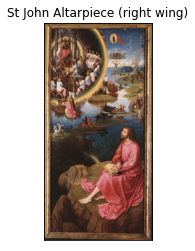

In [36]:
import params
    

from attributes import load_att_class
from dataloader_sym import ArtDatasetSym

args_dict = params.get_parser()
reload(an)
args_dict.dir_data = 'Data'
args_dict.mode = 'train'
args_dict.vocab_type = 'type2ind.csv'
args_dict.vocab_school = 'school2ind.csv'
args_dict.vocab_time = 'time2ind.csv'
args_dict.vocab_author = 'author2ind.csv'
args_dict.embedds = 'tfidf'
args_dict.dir_dataset = r'C:\Users\jf22881\Documents\SemArt'
args_dict.csvtrain = 'semart_train.csv'
args_dict.csvval = 'semart_val.csv'
args_dict.csvtest = 'semart_test.csv'
args_dict.dir_images = 'Images'
args_dict.targets = [10, 20 ,30]

#type2idx, school2idx, time2idx, author2idx = load_att_class(args_dict)
semart_train_loader = ArtDatasetSym(args_dict, set='train', symbol_detect=args_dict.targets)
semart_val_loader = ArtDatasetSym(args_dict, set='val', symbol_detect=args_dict.targets, canon_list=semart_train_loader.symbols_names) 
semart_test_loader = ArtDatasetSym(args_dict, set='test', symbol_detect=args_dict.targets, canon_list=semart_train_loader.symbols_names) 

semart_Gallery = an.Gallery(semart_train_loader.symbols_names, semart_train_loader.paintings_names, semart_train_loader.symbol_context, args_dict.dir_dataset)
val_Gallery = an.Gallery(semart_val_loader.symbols_names, semart_val_loader.paintings_names, semart_val_loader.symbol_context, args_dict.dir_dataset)
test_Gallery = an.Gallery(semart_test_loader.symbols_names, semart_test_loader.paintings_names, semart_test_loader.symbol_context, args_dict.dir_dataset)

semart_Gallery.vis_painting_symbols(15579, True)


In [40]:
symbols = semart_Gallery.symbol_context[15579,:]
[x for ix, x in enumerate(semart_Gallery.symbols_names.values.tolist())]


[['shadow'],
 ['ring'],
 ['sword'],
 ['bird'],
 ['tree'],
 ['farmer'],
 ['snow'],
 ['hunter'],
 ['ruins'],
 ['elements'],
 ['flight'],
 ['musician'],
 ['triumph'],
 ['ark'],
 ['eagle'],
 ['love'],
 ['bow'],
 ['salvation'],
 ['body'],
 ['twilight'],
 ['birds'],
 ['venus'],
 ['branch'],
 ['hero'],
 ['laurel'],
 ['chariot'],
 ['lover'],
 ['procession'],
 ['prince'],
 ['relief'],
 ['cold'],
 ['jupiter'],
 ['animals'],
 ['wine'],
 ['column'],
 ['eight'],
 ['hair'],
 ['hand'],
 ['devil'],
 ['object'],
 ['goblet'],
 ['treasure'],
 ['light'],
 ['heaven'],
 ['bell'],
 ['wolf'],
 ['meadow'],
 ['fire'],
 ['earth'],
 ['valley'],
 ['arrow'],
 ['lion'],
 ['child'],
 ['vessel'],
 ['woman'],
 ['world'],
 ['shepherd'],
 ['hat'],
 ['head'],
 ['egypt'],
 ['music'],
 ['journey'],
 ['marks'],
 ['bear'],
 ['four'],
 ['twelve'],
 ['return'],
 ['cow'],
 ['apollo'],
 ['storm'],
 ['power'],
 ['fall'],
 ['figures'],
 ['six'],
 ['cross'],
 ['steps'],
 ['moon'],
 ['bath'],
 ['mask'],
 ['nature'],
 ['stone'],
 ['st

In [17]:
semart_Gallery.symbol_report()

KeyError: "None of [Int64Index([152,  89,  41, 180, 223,  19, 210,  40, 127, 202,\n            ...\n            108,  64, 154,  42, 147,  52, 200, 193,  72, 174],\n           dtype='int64', length=225)] are in the [columns]"

In [126]:
semart_Gallery = an.Gallery(symbols_names, paintings_names, symbol_context, an.args_dict.dir_dataset)

225 225


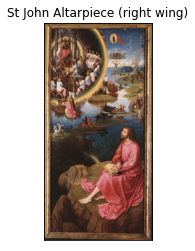

In [19]:
semart_Gallery.vis_painting_symbols(15579, True)

In [5]:
semart_Gallery.density_symbolic_paintings(10)

array([15579, 17716,  3014,  2378, 13041, 11309, 10818,  9605, 14981,
        2436], dtype=int64)

225 225


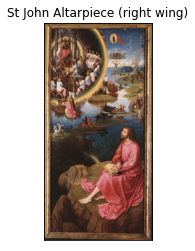

In [6]:
semart_Gallery.vis_painting_symbols(15579, True)

In [111]:
semart_Gallery.symbol_context.sum(axis=1).argmax()

15579